In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel(r'C:\Jypiter\Panel_po_KO_01_2016_shifr.xlsx')
df = data.iloc[:,13:]
df_bad = data['bad']
df.head()
df.shape

(738, 33)

In [3]:
X_embedded = TSNE(n_components=2).fit_transform(df)
X_embedded.shape

(738, 2)

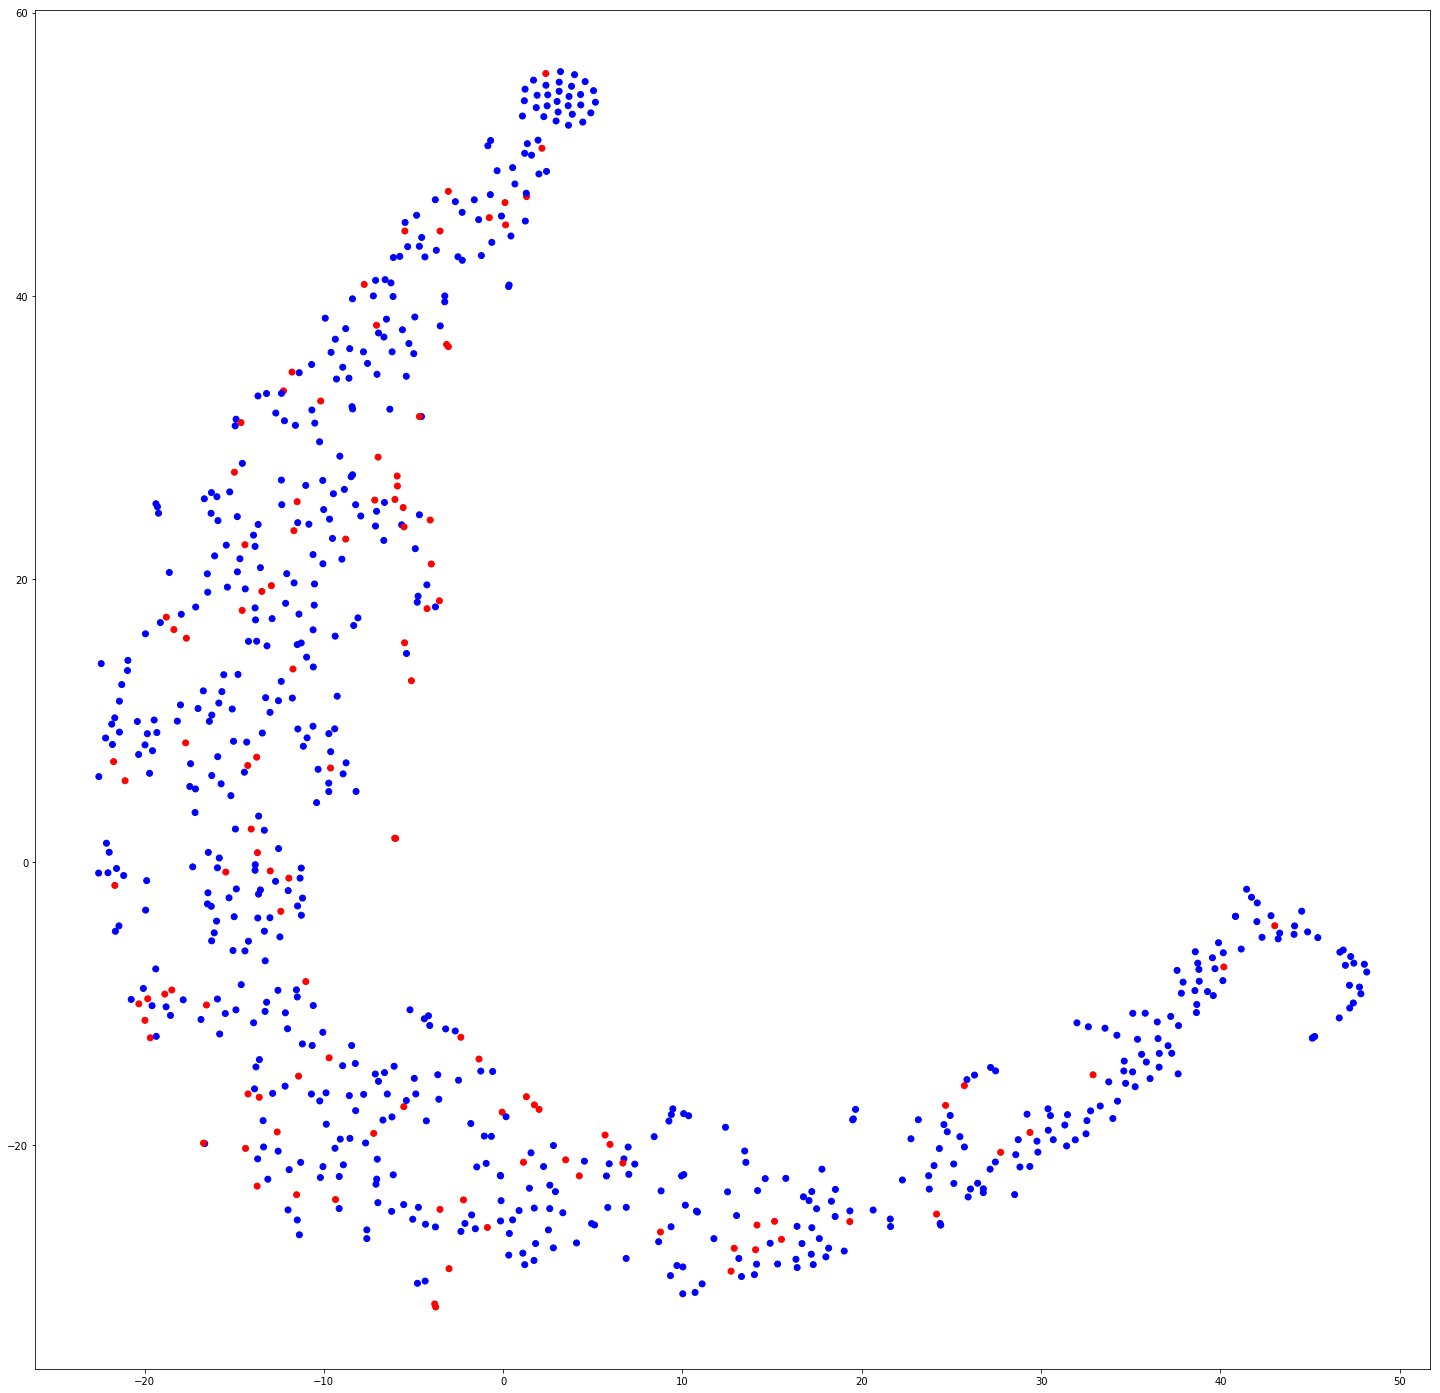

In [4]:
df = data.iloc[:,1:68]
plt.figure(figsize=(25,25))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=data['bad'].map({1: 'red', 0: 'blue'}))
plt.label = 'Result'

In [5]:
data['tsne_1'] = X_embedded[:, 0]
data['tsne_2'] = X_embedded[:, 1]

data.to_excel('TSNE.xlsx')
data.head()

,Период,Год,Месяц,КО,bad,ФО,СФ,Сотня по активам,Включен в перечень системно-значимых КО,Соотв. 213-ФЗ,...,x26,x27,x28,x29,x30,x31,x32,x33,tsne_1,tsne_2
0,201601,2016,1,КО1,0,ЦФО,Город Москва,1,1,Соотв. ФЗ №213,...,0.219521,0.001457,7.475206e+10,38.882476,3.048935e+09,84.485423,121,16.528926,42.052452,-2.872943
1,201601,2016,1,КО2,0,СЗФО,Город Санкт-Петербург,6,0,Не соотв. ФЗ №213,...,0.000000,0.000000,1.947736e+07,39.002186,6.615199e+07,94.129156,2,0.000000,-14.785696,13.259300
2,201601,2016,1,КО3,1,ЦФО,Город Москва,3,0,Не соотв. ФЗ №213,...,0.000000,0.000000,9.581336e+08,11.778609,9.114098e+07,91.606410,13,7.692308,-1.347828,-13.897882
3,201601,2016,1,КО4,0,ДФО,Приморский край,7,0,Не соотв. ФЗ №213,...,0.000000,0.000000,2.688957e+08,37.318897,2.399071e+09,5.447538,0,0.000000,21.604401,-25.726763
4,201601,2016,1,КО5,0,ПФО,Самарская область,0,0,Не соотв. ФЗ №213,...,0.005492,0.000000,7.351083e+08,80.052858,5.011699e+08,97.045228,11,0.000000,7.008258,-22.039333


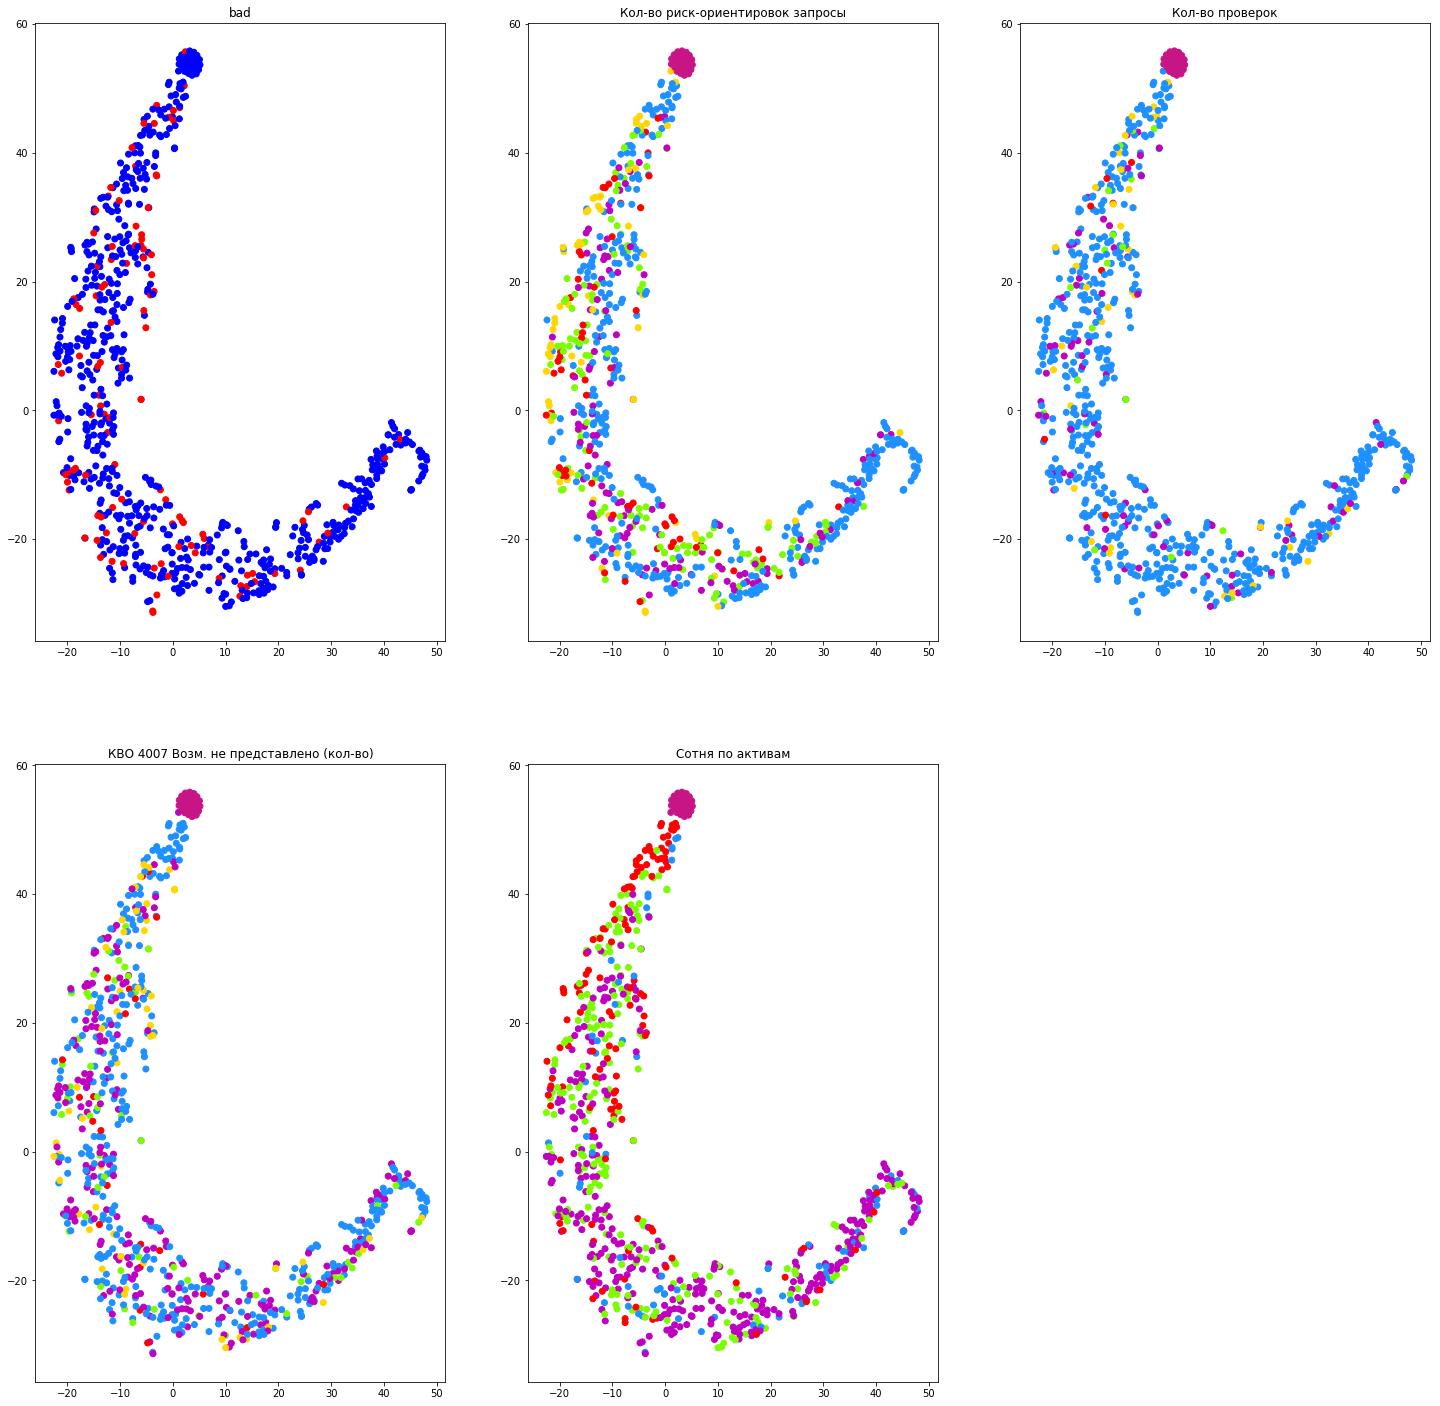

In [6]:
from matplotlib import pyplot as PLT

fig = PLT.figure(figsize=(25,25))

ax1 = fig.add_subplot(231)
ax1.scatter(X_embedded[:, 0], X_embedded[:, 1], 
            c=data['bad'].map({1: 'red', 0: 'blue'}));

ax2 = fig.add_subplot(232)
ax2.scatter(X_embedded[:, 0], X_embedded[:, 1], 
            c=df['x7'].map({1: 'dodgerblue', 2: 'm', 3: 'lawngreen', 4: 'red', 0: 'mediumvioletred',5: 'gold', 6: 'navy'}));

ax3 = fig.add_subplot(233)
ax3.scatter(X_embedded[:, 0], X_embedded[:, 1], 
            c=df['x8'].map({1: 'dodgerblue', 2: 'm', 3: 'lawngreen', 4: 'red', 0: 'mediumvioletred',5: 'gold', 6: 'navy'}));

ax4 = fig.add_subplot(234)
ax4.scatter(X_embedded[:, 0], X_embedded[:, 1], 
            c=df['x9'].map({1: 'dodgerblue', 2: 'm', 3: 'lawngreen', 4: 'red', 0: 'mediumvioletred',5: 'gold', 6: 'navy'}));

ax5 = fig.add_subplot(235)
ax5.scatter(X_embedded[:, 0], X_embedded[:, 1], 
            c=df['x10'].map({1: 'dodgerblue', 2: 'm', 3: 'lawngreen', 4: 'red', 0: 'mediumvioletred',5: 'gold'}));
            #c=df['x10'].map({1: 'dodgerblue', 2: 'm', 3: 'lawngreen', 4: 'red', 0: 'mediumvioletred',5: 'gold', 6: 'navy', 7: 'coral', 8: 'c', 9: 'darkorange'}));

ax1.set_title('bad');
ax2.set_title('Кол-во риск-ориентировок запросы');
ax3.set_title('Кол-во проверок');
ax4.set_title('КВО 4007 Возм. не представлено (кол-во)');
ax5.set_title('Сотня по активам');

PLT.show()